## OKCupid Machine Learning Project
This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep and analyze data. The second goal is to create ML models that can solve questions and predict outcomes.

### Project Objetives
- Load and check the data
- Exploratory analysis 
- Select the ML model 
- Build the model
- Train and evaluate the model
- Conclusions 

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status
- **last_online:** date variable of last login
- **location:** categorical variable of user locations

And a set of open short-answer responses to :

- **essay0:** My self summary
- **essay1:**  What I’m doing with my life
- **essay2:** I’m really good at
- **essay3:** The first thing people usually notice about me
- **essay4:** Favorite books, movies, show, music, and food
- **essay5:** The six things I could never do without
- **essay6:** I spend a lot of time thinking about
- **essay7:** On a typical Friday night I am
- **essay8:** The most private thing I am willing to admit
- **essay9:** You should message me if…

### Load and check the data

In [161]:
# import libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree

from sklearn.feature_selection import RFE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report




In [162]:
#load the data
profiles_data = pd.read_csv('profiles.csv')
profiles_df = pd.DataFrame(profiles_data)

display(profiles_df.info())
display(profiles_df.describe(include='all'))
#set theme for the seaborn plots
#context is for the size of the plot
#style is for the background of the plot
#palette is for the color of the plot
#font is for the font of the plot
#font_scale is for the size of the font
#color_codes is for the color of the plot
sn.set_theme(context='notebook', style='darkgrid', palette='tab10', font='sans-serif', font_scale=1, color_codes=True, rc=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

None

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
count,59946.000000,54650,35551,56961,45866,53318,54458,52374,50308,48470,...,59946,24385,59946,40025,39720,59946,48890,54434,59896,59946
unique,NaN,12,18,6,3,32,54350,51516,48635,43533,...,199,15,3,15,45,2,48,5,7647,5
top,NaN,average,mostly anything,socially,never,graduated from college/university,.,enjoying it.,listening,my smile,...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,gemini and it&rsquo;s fun to think about,no,english,single
freq,NaN,14652,16585,41780,37724,23959,12,61,82,529,...,31064,7560,51606,14814,2724,35829,1782,43896,21828,55697
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
display(profiles_df.head())

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [164]:
print(profiles_df.status.value_counts())

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64


- Looking at the status feature seems to be only 10 datapoints that labeled the status as "unkown". Interesting that they decided not to include it in a dating app

In [165]:
display(profiles_df[profiles_df['status'] == 'unknown'])

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
17337,57,average,mostly anything,rarely,NaN,graduated from high school,as an artist i like to borrow images that i li...,filling life with as much colour as i can.,spinning records &amp; dabbing brushes.,i have an assortment of hand-painted shirts i ...,...,"menlo park, california",doesn&rsquo;t want kids,gay,likes dogs and likes cats,other,m,leo,no,"english, english",unknown
20367,38,average,NaN,socially,NaN,NaN,fun loving professional guy. i live in oakland...,NaN,NaN,NaN,...,"oakland, california",NaN,straight,NaN,NaN,m,NaN,NaN,english,unknown
31148,31,athletic,NaN,socially,never,working on masters program,believing that anything can happen. or just tr...,social entrepreneur + product marketer,"balancing a spoon on my nose, making monkey fa...",big eyes,...,"san francisco, california",NaN,straight,NaN,NaN,m,aquarius,no,"english (okay), chinese (okay), spanish (okay)...",unknown
32848,38,NaN,NaN,socially,NaN,graduated from college/university,"i'm easy going, funny, and don't do anything h...",i'm an independent consultant. i mostly work w...,"<a class=""ilink"" href=""/interests?i=cooking"">c...",my eyes and my smile,...,"san francisco, california",NaN,straight,NaN,NaN,m,aries and it&rsquo;s fun to think about,no,"english (fluently), french",unknown
38009,27,NaN,NaN,rarely,never,working on college/university,"hi there! i'm new here, and looking to make so...","right now, i am pursuing a degree in anthropol...","listening, playing music, cooking, helping peo...","my warped sense of humor, my clothing (i'm a h...",...,"san francisco, california",NaN,straight,has dogs and has cats,agnosticism and laughing about it,f,scorpio but it doesn&rsquo;t matter,no,"english (fluently), irish (fluently), chinese ...",unknown
42771,37,average,mostly anything,socially,never,dropped out of college/university,um. hi. i'm pretty bad at filling out these th...,NaN,NaN,NaN,...,"berkeley, california",NaN,straight,likes dogs and likes cats,buddhism but not too serious about it,m,pisces but it doesn&rsquo;t matter,no,"english (fluently), german (okay), japanese (o...",unknown
45885,22,curvy,mostly anything,socially,never,NaN,i decided it was about time to change this. al...,graduated from culinary school with a baking a...,talking and listening. believe me they go righ...,"either than i'm really shy and quiet, or on th...",...,"walnut creek, california",doesn&rsquo;t want kids,straight,has dogs and likes cats,NaN,f,leo and it&rsquo;s fun to think about,no,"english (fluently), japanese (poorly), spanish...",unknown
47999,26,a little extra,anything,not at all,never,working on college/university,i am <b><i>lol.</i></b><br />\n<br />\np3n0r m...,lol@collegio,crap,hobo,...,"pleasant hill, california",NaN,straight,has cats,agnosticism and laughing about it,f,capricorn and it&rsquo;s fun to think about,no,"english (fluently), c++ (poorly)",unknown
50957,43,fit,NaN,socially,NaN,NaN,i am cool but rude. i am charged to heal the e...,NaN,"reeling and writhing, of course, to begin with...",NaN,...,"san francisco, california",NaN,straight,NaN,NaN,m,NaN,no,"english (fluently), malay (okay), chinese (poo...",unknown
57301,36,NaN,NaN,not at all,never,graduated from two-year college,i'm not here looking for a date. i'm here look...,NaN,"cooking, photography, arguing.",NaN,...,"mill valley, california",has a kid,straight,NaN,christianity and very serious about it,f,leo and it&rsquo;s fun to think about,no,english,unknown


### Exploratory analysis

#### Age 

c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

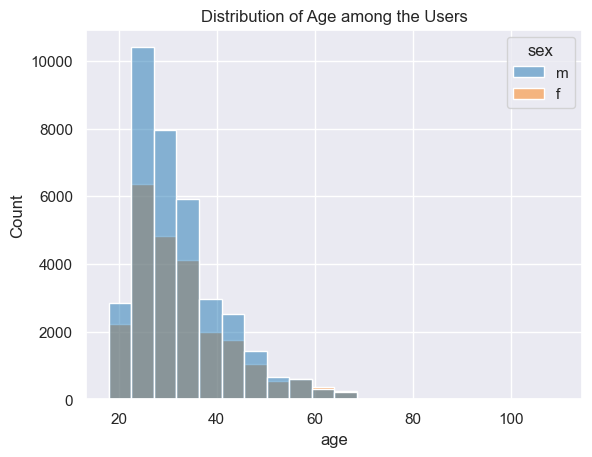

c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

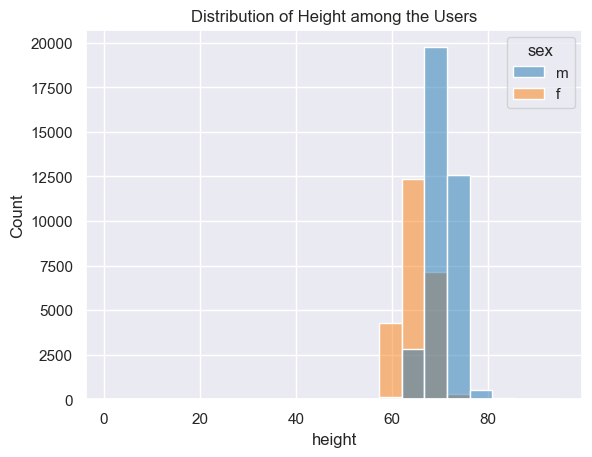

c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\cuate\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

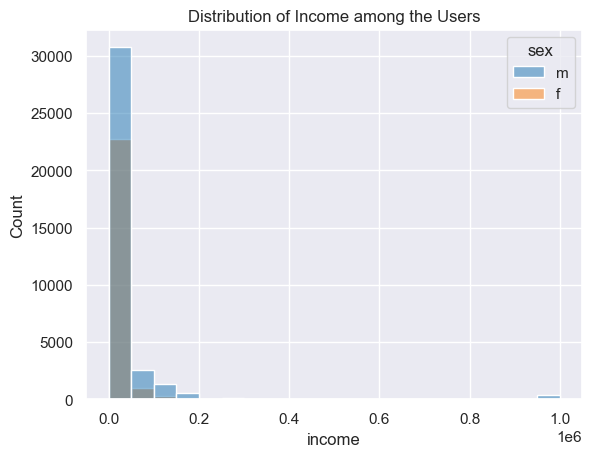

In [167]:
# Age distribution
sn.histplot(data=profiles_df,x='age', bins=20, hue='sex')
plt.title('Distribution of Age among the Users')
plt.show()
plt.close()
# Height distribution
sn.histplot(data=profiles_df,x='height', bins=20, hue='sex')
plt.title('Distribution of Height among the Users')
plt.show()
plt.close()
# Income distribution
sn.histplot(data=profiles_df,x='income', bins=20, hue='sex')
plt.title('Distribution of Income among the Users')
plt.show()
plt.close()

#### Age and Status

32.3402895939679
18
110


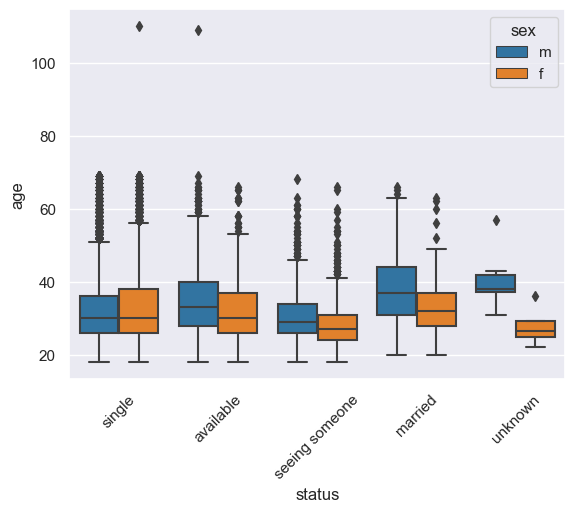

In [168]:
print(profiles_df.age.mean())
print(profiles_df.age.min())
print(profiles_df.age.max())
sn.boxplot(data=profiles_df, x='status' , y='age', hue='sex')
plt.xticks(rotation=45)
plt.show()
plt.close()

#### Income and Status

20033.222533613585
-1
1000000


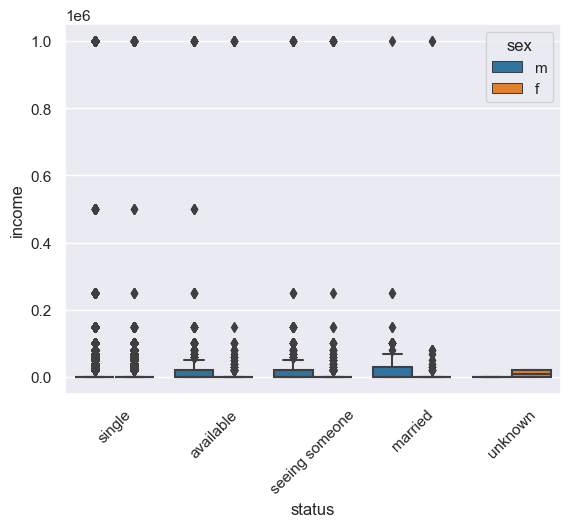

In [169]:
print(profiles_df.income.mean())
print(profiles_df.income.min())
print(profiles_df.income.max())
sn.boxplot(data=profiles_df, x='status' , y='income', hue='sex')
plt.xticks(rotation=45)
plt.show()

#### Heigth and Status

68.29528051649066
1.0
95.0


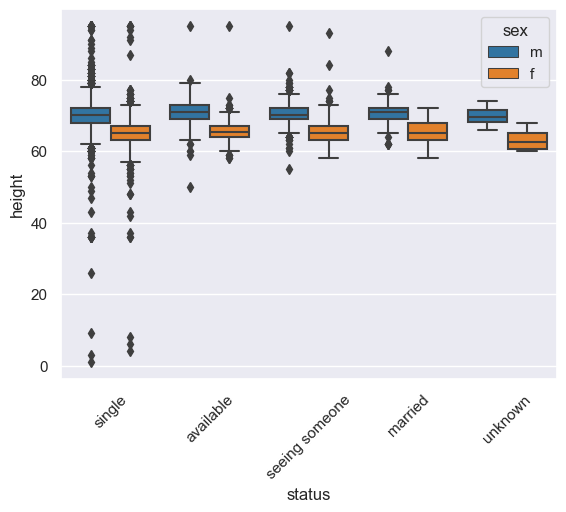

In [170]:
print(profiles_df.height.mean())
print(profiles_df.height.min())
print(profiles_df.height.max())
sn.boxplot(data=profiles_df, x='status' , y='height', hue='sex')
plt.xticks(rotation=45)
plt.show()

### Classification Models
- This model will try to predict the relationship **status** based on the followwing features:
- **Age**
- **Height**
- **Income**
- **Drinks**
- **Smokes**
- **Orientation**
- **Body_type**
- **Diet**

- The model will use the following classification methods and compare them based on scores:
  - **Decision Tree**
  - **KNN**
  - **Random Forest**

- Feature Engineering will be done prior to model fit

#### Feature Engineering

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64


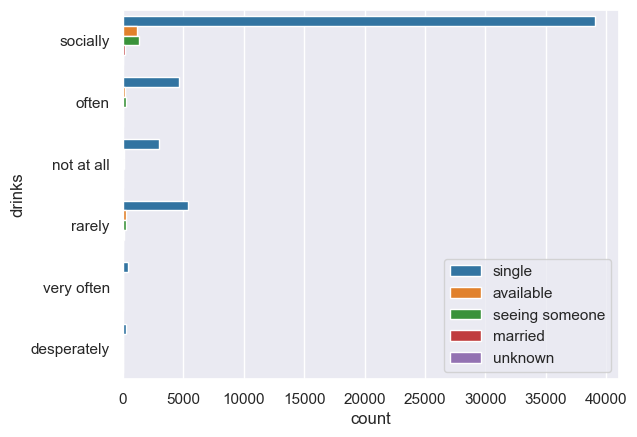

smokes
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64


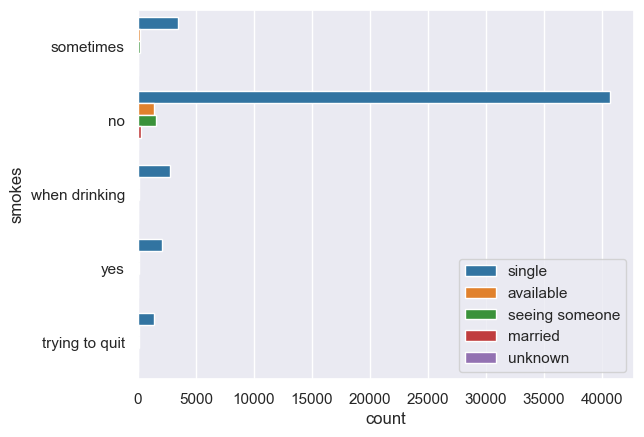

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64


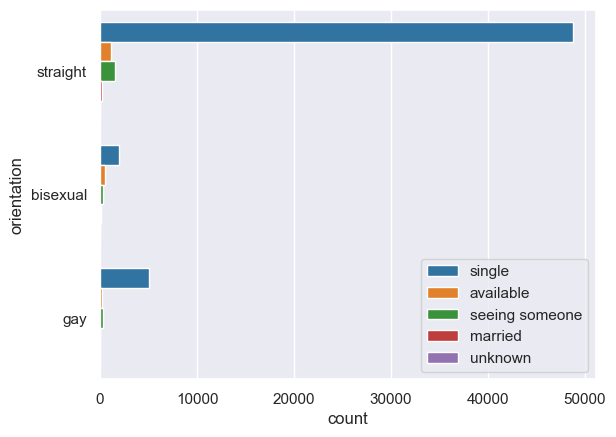

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64


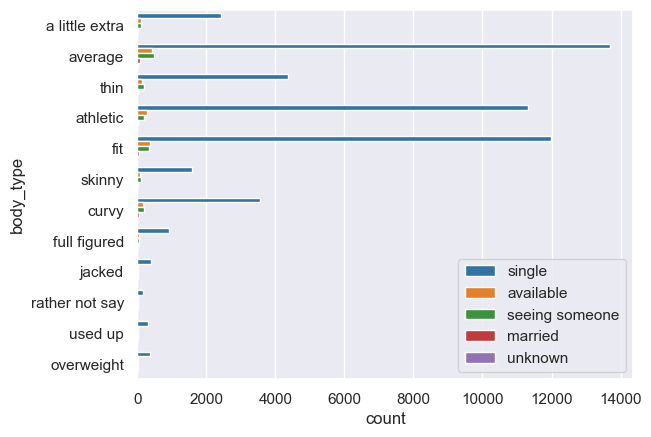

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64


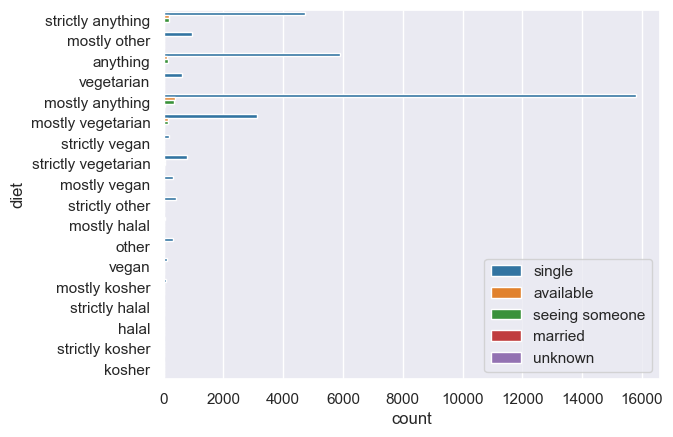

In [171]:
print(profiles_df.drinks.value_counts())
sn.countplot(data=profiles_df, y='drinks', hue='status')
plt.legend(loc='lower right')
plt.show()
print(profiles_df.smokes.value_counts())
sn.countplot(data=profiles_df, y='smokes', hue='status')
plt.legend(loc='lower right')
plt.show()
print(profiles_df.orientation.value_counts())
sn.countplot(data=profiles_df, y='orientation', hue='status')
plt.legend(loc='lower right')
plt.show()
print(profiles_df.body_type.value_counts())
sn.countplot(data=profiles_df, y='body_type', hue='status')
plt.legend(loc='lower right')
plt.show()
print(profiles_df.diet.value_counts())
sn.countplot(data=profiles_df, y='diet', hue='status')
plt.legend(loc='lower right')
plt.show()

In [172]:
# Use column transformer for normalization and one hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# drop the NaN values
profiles_df.dropna(subset=['age', 'height', 'income','drinks', 'smokes','orientation', 'body_type', 'diet'],inplace=True)

# define features and labels
X = profiles_df.drop('status', axis=1)
y = profiles_df['status']

# define the columns transformer as a touple ct([(x,y)])
ct = ColumnTransformer([("Standarizing", StandardScaler(),['age', 'height', 'income']),
                       ("One hot", OneHotEncoder(sparse_output=False),['drinks', 'smokes','orientation', 'body_type', 'diet'])])

# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X.shape)
print(y.shape)
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)
display(ct.get_feature_names_out())


(31518, 30)
(31518,)
(25214, 47)


array(['Standarizing__age', 'Standarizing__height',
       'Standarizing__income', 'One hot__drinks_desperately',
       'One hot__drinks_not at all', 'One hot__drinks_often',
       'One hot__drinks_rarely', 'One hot__drinks_socially',
       'One hot__drinks_very often', 'One hot__smokes_no',
       'One hot__smokes_sometimes', 'One hot__smokes_trying to quit',
       'One hot__smokes_when drinking', 'One hot__smokes_yes',
       'One hot__orientation_bisexual', 'One hot__orientation_gay',
       'One hot__orientation_straight',
       'One hot__body_type_a little extra', 'One hot__body_type_athletic',
       'One hot__body_type_average', 'One hot__body_type_curvy',
       'One hot__body_type_fit', 'One hot__body_type_full figured',
       'One hot__body_type_jacked', 'One hot__body_type_overweight',
       'One hot__body_type_rather not say', 'One hot__body_type_skinny',
       'One hot__body_type_thin', 'One hot__body_type_used up',
       'One hot__diet_anything', 'One hot__diet_h

#### Decision Tree Base Model

In [173]:
# Decision Tree model
dtc = DecisionTreeClassifier()
dtc.fit(X_train_trans,y_train)
X_test_trans = ct.transform(X_test)
y_pred = dtc.predict(X_test_trans)

print(f'The model performance is: {dtc.score(X_test_trans, y_test)}')
print(classification_report(y_test, y_pred))

The model performance is: 0.8799175126903553
                precision    recall  f1-score   support

     available       0.05      0.06      0.05       179
       married       0.00      0.00      0.00        30
seeing someone       0.02      0.03      0.03       162
        single       0.94      0.93      0.94      5933
       unknown       0.00      0.00      0.00         0

      accuracy                           0.88      6304
     macro avg       0.20      0.20      0.20      6304
  weighted avg       0.89      0.88      0.89      6304



c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- The base decision tree model performs ok with these features. Important to note that this base model considered the status "unknown" as a separete category
- To improve the model I will test to eliminate those data points from the data, since this is logically not a relationship status, most likely the users did not want to put their status


(25211, 47)
The model performance is: 0.9370141202601936


c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                precision    recall  f1-score   support

     available       0.00      0.00      0.00       206
       married       0.00      0.00      0.00        25
seeing someone       0.00      0.00      0.00       166
        single       0.94      1.00      0.97      5906

      accuracy                           0.94      6303
     macro avg       0.23      0.25      0.24      6303
  weighted avg       0.88      0.94      0.91      6303



c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


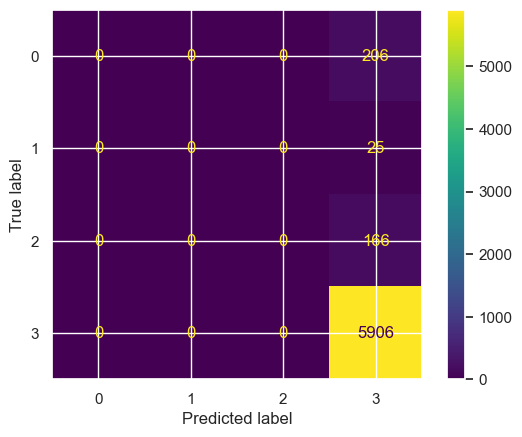

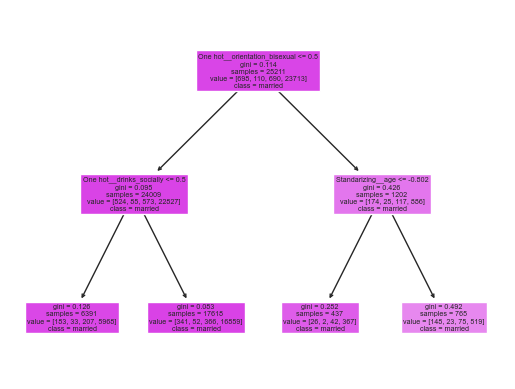

In [174]:
# drop the data with labels that have relationship status unknown
data_frame_4cat = profiles_df[profiles_df['status']!= 'unknown']

# define features and labels
X = data_frame_4cat.drop('status', axis=1)
y = data_frame_4cat['status']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the columns transformer as a touple ct([(x,y)])
ct_2 = ColumnTransformer([("Standarizing", StandardScaler(),['age', 'height', 'income']),
                       ("One hot", OneHotEncoder(sparse_output=False),['drinks', 'smokes','orientation', 'body_type', 'diet'])])

# split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct_2.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

# Decision Tree model
dtc = DecisionTreeClassifier(random_state=42, max_depth=2)
dtc.fit(X_train_trans, y_train)
X_test_trans = ct.transform(X_test)
y_pred = dtc.predict(X_test_trans)

print(f'The model performance is: {dtc.score(X_test_trans, y_test)}')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()
plt.close()

# Plot tree model
feature_names = ct_2.get_feature_names_out()
tree.plot_tree(dtc, feature_names = feature_names,  
               class_names = y.unique(),
                filled=True)
plt.show()
plt.close()

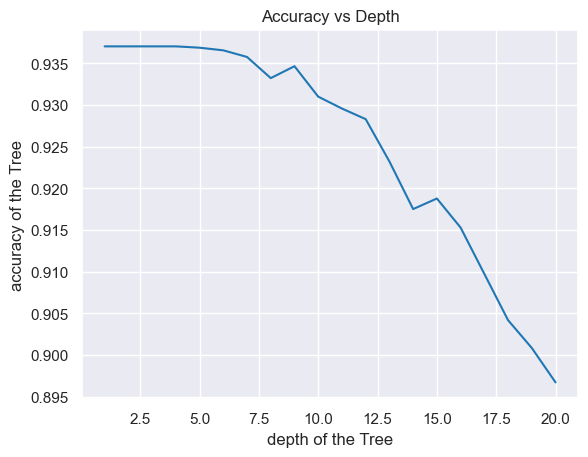

1


In [175]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for items in depths:
  dtree = DecisionTreeClassifier(random_state=10,max_depth = items)
  dtree.fit(X_train_trans,y_train)
  acc_depth.append(dtree.score(X_test_trans,y_test))


#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('depth of the Tree')
plt.ylabel('accuracy of the Tree')
plt.title('Accuracy vs Depth')
plt.show()
plt.close()

#Find the largest accuracy and the depth this occurs
max_acc = np.max(acc_depth)
best_depth = depths[np.argmax(acc_depth)]

print(best_depth)

- Removing the category did improve the model peformance. However, given that the single category is the most likely, the model score is not a suitable metric
- The decision tree will be reduced in features using recursive feature elimination

In [176]:
rfe = RFE(dtc, n_features_to_select=10)
rfe.fit(X_train_trans,y_train)

#feature names
features = ct.get_feature_names_out()

#get the features
rfe_features = [f for f, s in zip(features, rfe.support_) if s]

#print rfe_features
display(rfe_features)

#print score
display(rfe.score(X_test_trans, y_test))


['Standarizing__age',
 'One hot__drinks_socially',
 'One hot__orientation_bisexual',
 'One hot__diet_mostly anything',
 'One hot__diet_mostly halal',
 'One hot__diet_mostly kosher',
 'One hot__diet_mostly other',
 'One hot__diet_mostly vegan',
 'One hot__diet_mostly vegetarian',
 'One hot__diet_other']

0.9370141202601936

#### Summary
- The base model decision tree well but not optimal
- eliminating the catergory "unkown" did improve the model peformance from 0.88 to 0.93
- Setting the max_depth to 10 did not improved the model performance, the optimal depths is already at 1, given the high imbalance of the dataset.
- The final improvement to the model was done by applying a recursive feature elimination
- The recursive feature elimination model showed that the 10 most important feature to predict the status of a person would be drinking socially, orientation bisexual and diet preferences
- The model is not good for predicting the status of a person. The labels are highly inbalanced

#### KNN classification model

The model performance is: 0.9309852451213708
                precision    recall  f1-score   support

     available       0.24      0.04      0.07       206
       married       0.00      0.00      0.00        25
seeing someone       0.06      0.01      0.02       166
        single       0.94      0.99      0.96      5906

      accuracy                           0.93      6303
     macro avg       0.31      0.26      0.26      6303
  weighted avg       0.89      0.93      0.91      6303



c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cuate\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


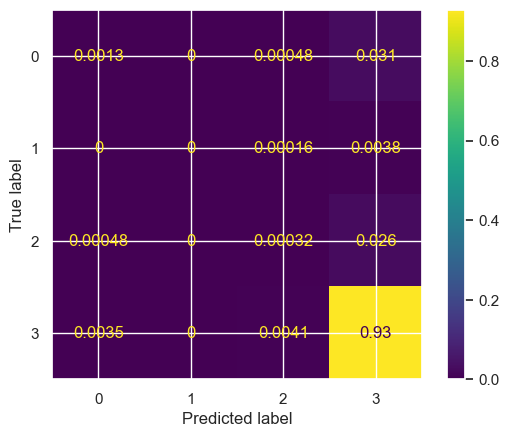

In [177]:
# KNN classification
knn = KNeighborsClassifier(n_neighbors=4)


knn.fit(X_train_trans, y_train)
y_pred = knn.predict(X_test_trans)

print(f'The model performance is: {knn.score(X_test_trans, y_test)}')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot()

- The model performance is improved, however the model is imbalanced as the majority of the users have a "single" status, this can be observed in the low recall level.

#### Random Forest classification

The model performance is: 0.9316198635570363
                precision    recall  f1-score   support

     available       0.19      0.02      0.04       206
       married       0.00      0.00      0.00        25
seeing someone       0.10      0.01      0.02       166
        single       0.94      0.99      0.96      5906

      accuracy                           0.93      6303
     macro avg       0.31      0.26      0.26      6303
  weighted avg       0.89      0.93      0.91      6303

The top 5 features of the best random forest model are:


,feature,importance
0,Standarizing__age,0.310974
1,Standarizing__height,0.245885
2,Standarizing__income,0.077786
14,One hot__orientation_bisexual,0.021108
19,One hot__body_type_average,0.019306


The accuracy of the model is:
0.9316198635570363


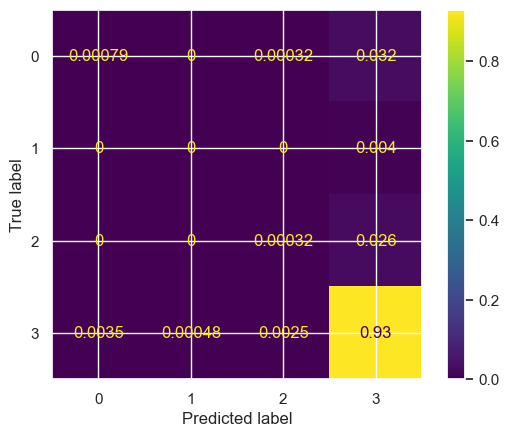

In [187]:
# Random Forest classification

# train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_trans, y_train)
y_pred = rf.predict(X_test_trans)

# model performance
print(f'The model performance is: {rf.score(X_test_trans, y_test)}')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='all')
cm_display = ConfusionMatrixDisplay(cm).plot()

# plot the top 5 feautures
importances = pd.DataFrame(zip(ct.get_feature_names_out(),rf.feature_importances_), columns=['feature','importance'])
importances.sort_values(by='importance', ascending=False, inplace=True)
print('The top 5 features of the best random forest model are:')
display(importances.head())
print('The accuracy of the model is:')
print(accuracy_score(y_test, rf.predict(X_test_trans)))

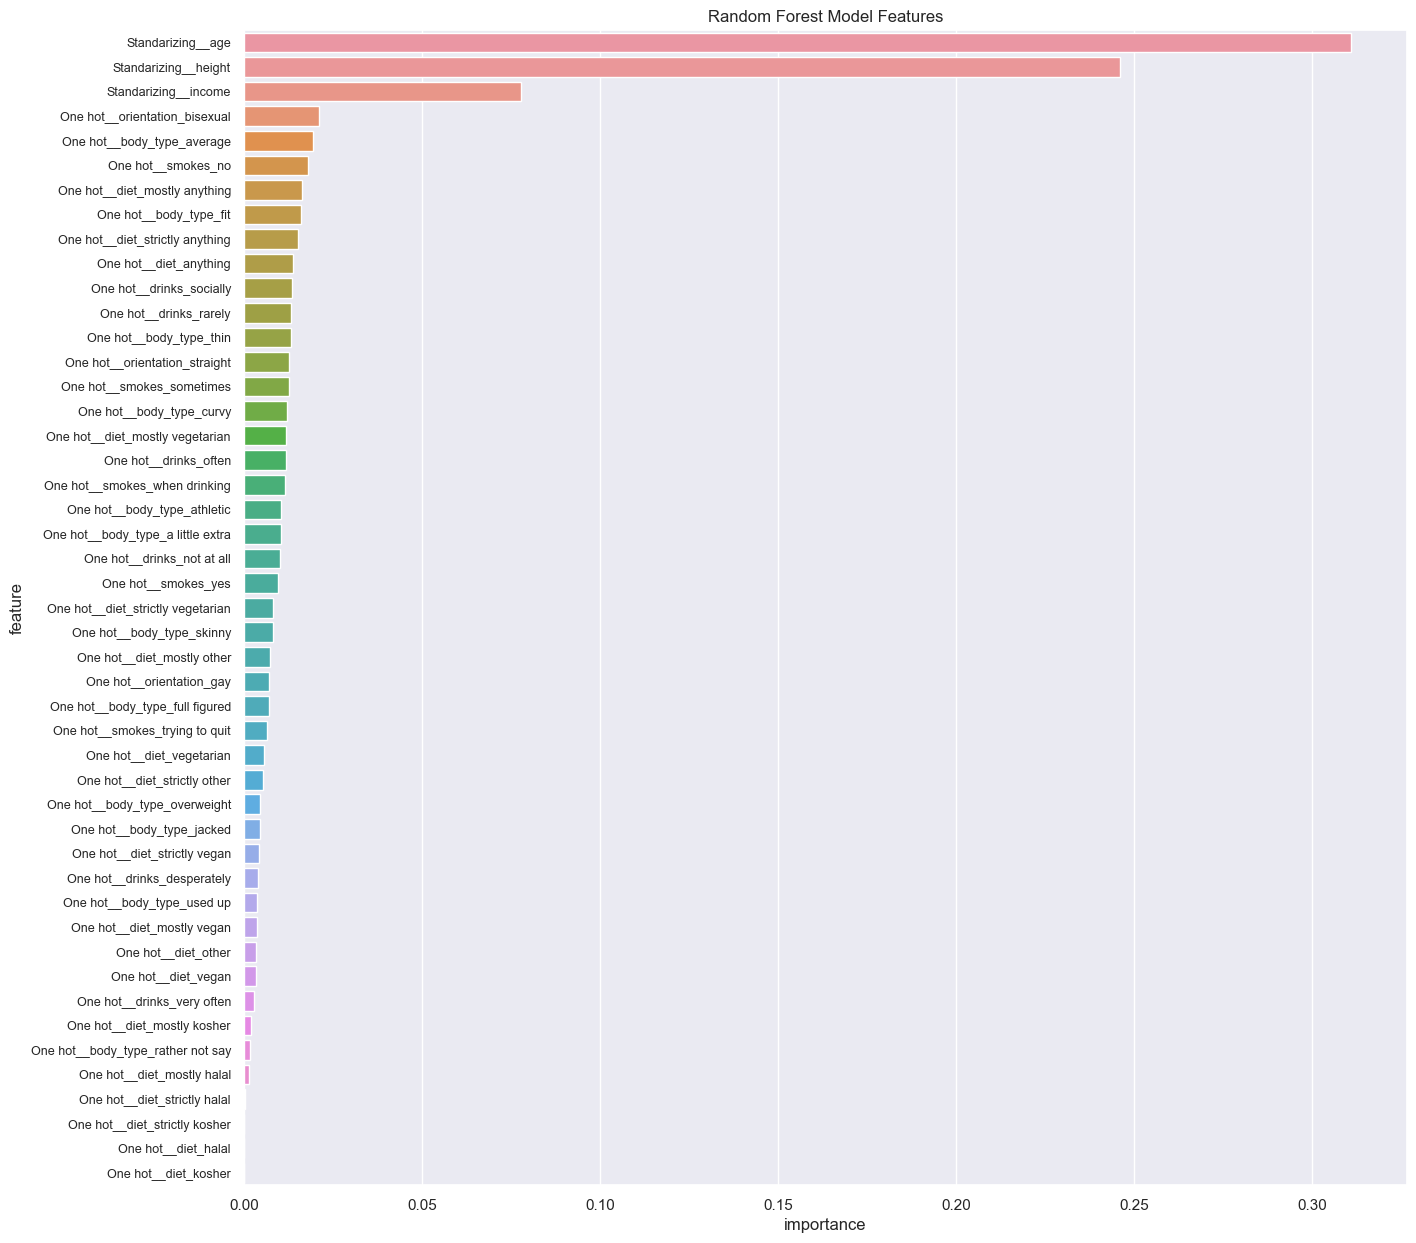

In [188]:
#plot the feature importance
plt.figure(figsize=(15,15))
sn.barplot(x=importances.importance, y=importances.feature)
plt.yticks(fontsize=9)
plt.title('Random Forest Model Features')
plt.show()
plt.close()

- The random forest model also performs very well on the test set
- When plotting the features we can observe that the most important feature for determining the status of a person is the age, followed by the height and the income 

### Conslusions
- 3 models were evaluated:
  - Decision Tree
  - K Nearest Neighbors
  - Random Forest Classifier
- These models were trained with the following parameters: 
  - **`Age`** 
  - **`Height`**
  - **`Income`**
  - **`Drinks`**
  - **`Smokes`**
  - **`Orientation`**
  - **`Body_type`**
  - **`Diet`**
- Standardization and One hot encoding was done prior model training
- According the classification report, the decision tree was used as a base model. In this dataset the "unknown" category was not filtered. The following models was trained without these datapoints. 
- The Decision Tree model score was 0.937
- The KNN model score was 0.930
- The Random Forest Classifier score was 0.931
- All the models performed quite well given that the data was imbalanced with most of the status labeled as "single". The score evaluation is not a good indicator for these types of datasets.  
- Based on the recall of the classification report, the classification model that best performed was KNN
